<img style="float: left;;" src='Figures/alinco.png' /></a>
# <center> <font color= #000047> Intervalos </font> </center>

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [6]:
boston.data.shape

(506, 13)

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston.target.shape

(506,)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression

In [13]:
df_bosoton = pd.DataFrame(data=boston.data, columns = boston.feature_names)

In [14]:
df_bosoton

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
df_bosoton.to_csv('Boston.csv')

# Extracción de características por intervalos

In [16]:
data = pd.read_csv('Data/h2o.csv')

In [17]:
data.head()

,x,fecha
0,0.429795,1991-07-01
1,0.400906,1991-08-01
2,0.432159,1991-09-01
3,0.492543,1991-10-01
4,0.502369,1991-11-01


In [18]:
data['fecha'].dtype

dtype('O')

In [19]:
data['fecha'] = pd.to_datetime(data['fecha'])


In [22]:
type(data['fecha'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
data['fecha'].dt.year, data['fecha'].dt.month

(0      1991
 1      1991
 2      1991
 3      1991
 4      1991
        ... 
 199    2008
 200    2008
 201    2008
 202    2008
 203    2008
 Name: fecha, Length: 204, dtype: int64,
 0       7
 1       8
 2       9
 3      10
 4      11
        ..
 199     2
 200     3
 201     4
 202     5
 203     6
 Name: fecha, Length: 204, dtype: int64)

In [26]:
data['año'] = data.fecha.dt.year

In [27]:
data['mes'] = data.fecha.dt.month

In [28]:
data.head()

,x,fecha,año,mes
0,0.429795,1991-07-01,1991,7
1,0.400906,1991-08-01,1991,8
2,0.432159,1991-09-01,1991,9
3,0.492543,1991-10-01,1991,10
4,0.502369,1991-11-01,1991,11


In [31]:
datetime.datetime.timestamp(data['fecha'][0])

678348000.0

In [32]:
data['seg'] = data['fecha'].map(datetime.datetime.timestamp)
data.head()

,x,fecha,año,mes,seg
0,0.429795,1991-07-01,1991,7,678348000.0
1,0.400906,1991-08-01,1991,8,681026400.0
2,0.432159,1991-09-01,1991,9,683704800.0
3,0.492543,1991-10-01,1991,10,686296800.0
4,0.502369,1991-11-01,1991,11,688975200.0


In [33]:
w = data['seg']/(60*60*24*365.2425)*2*np.pi #un año equivale a 31536000 segundos
data['sin t'] = np.sin(w)
data['cos t'] = np.cos(w)

<AxesSubplot:>

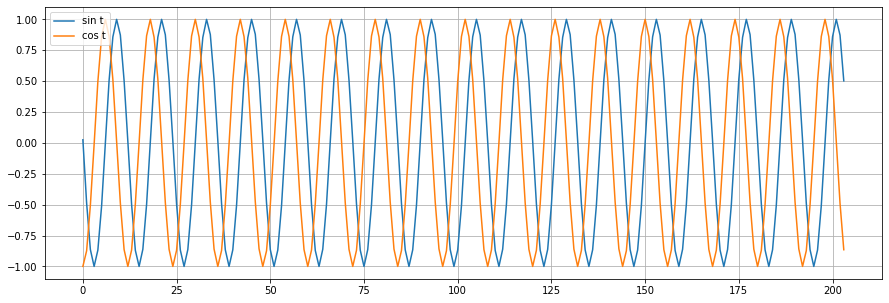

In [34]:
data[['sin t', 'cos t']].plot(grid=True, figsize=(15,5))

<AxesSubplot:>

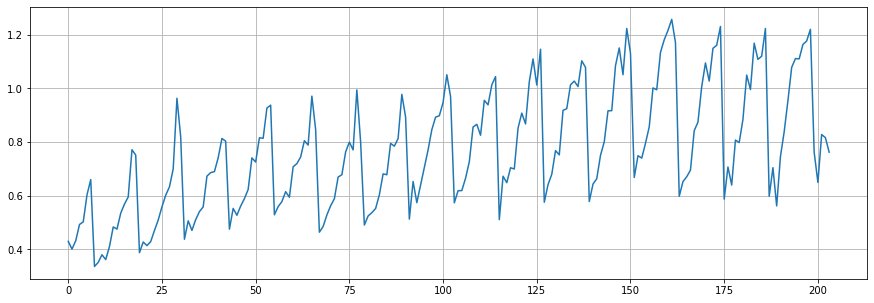

In [35]:
data['x'].plot(grid=True, figsize=(15,5))

In [36]:
data.shape

(204, 7)

## Extracción de características por intervalos

In [37]:
data.head()

,x,fecha,año,mes,seg,sin t,cos t
0,0.429795,1991-07-01,1991,7,678348000.0,0.025178,-0.999683
1,0.400906,1991-08-01,1991,8,681026400.0,-0.486523,-0.873668
2,0.432159,1991-09-01,1991,9,683704800.0,-0.863108,-0.505020
3,0.492543,1991-10-01,1991,10,686296800.0,-0.999911,-0.013321
4,0.502369,1991-11-01,1991,11,688975200.0,-0.867837,0.496849


In [40]:
me = []
std = []
tendencia = []
w = 6         # Tamaño de la ventana
x = data['x'] # SSerie de tiempo

lin = LinearRegression()
for i in range(len(x)-w):
    me.append(x[i:i+w].mean()) #Media del intervalo
    std.append(x[i:i+w].std()) #desviación estándar del intervalo
    
    t = data['seg'][i:i+w].values/(60*60*24*365.2425) #el tiempo en seg
    lin.fit(t.reshape(-1,1), x[i:i+w]) # El entrenamiento de la regresión lineal para cada intervalo
    tendencia.append(lin.coef_[0])      # la tendencia representa la pendiente de la regresión lineal en cada intervalo
    
    

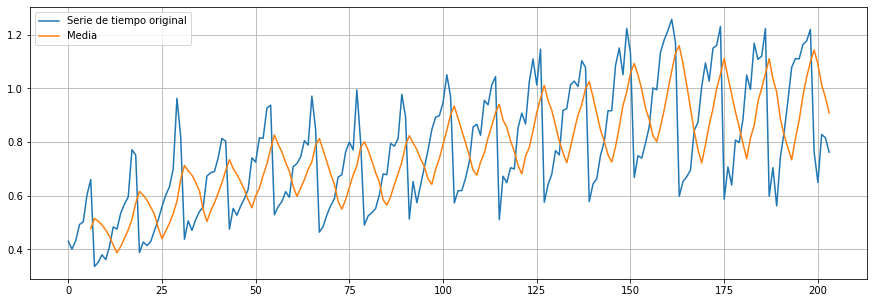

In [41]:
plt.figure(figsize=(15,5))
plt.plot(x, label='Serie de tiempo original')
plt.plot(data.index[w:], me, label='Media')
plt.legend()
plt.grid()

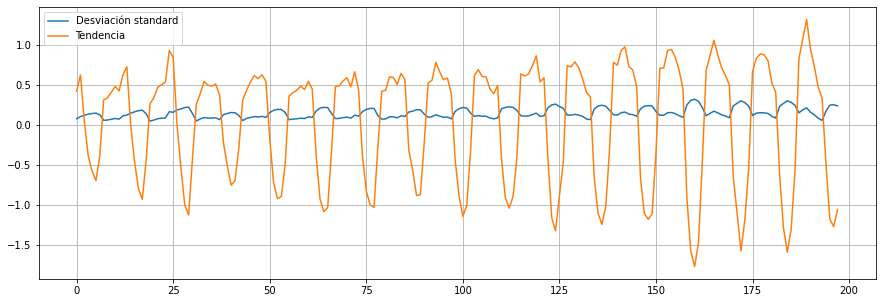

In [42]:
plt.figure(figsize=(15,5))
plt.plot(std, label='Desviación standard')
plt.plot(tendencia, label='Tendencia')
plt.legend()
plt.grid()

# Regresión

In [ ]:
from scipy.stats import zscore

In [ ]:
X=zscore(np.array([me,std,tendencia,data['sin t'].values[w:],data['cos t'].values[w:]]).T)
Y=zscore(data['x'][w:])
X.shape,Y.shape

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
nnet=keras.Sequential([
                       keras.Input(shape=(5,)),
                       layers.Dense(5,activation=tf.nn.tanh),
                       layers.Dense(1,activation=tf.nn.tanh)
])
nnet.compile(loss='mean_squared_error',optimizer='sgd')

In [ ]:
nnet.summary()

In [ ]:
nnet.fit(X,Y/2,epochs=500)

In [ ]:
y=nnet(X)
plt.plot(y,label='regresión')
plt.plot(Y/2,label='Serie')
plt.legend()
plt.grid()